### Importing Necessary Libraries

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Dataset

In [253]:
train = pd.read_csv('C:/Users/HP/Desktop/Loan Prediction Kaggle/train_loan.csv')
test = pd.read_csv('C:/Users/HP/Desktop/Loan Prediction Kaggle/test_loan.csv')

In [254]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [255]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Variable Description

- **Dependents: number of people dependent on the applicant**
- **Applicant/Coapplicant Income/ Loan Amount: Amounts are in Thousands**
- **Loan_Amount_Term: Number of Months required to repay the loan**
- **Credit_History: Credit history meets guidelines(1 = Yes, 0 = No)** 

In [256]:
train.shape

(614, 13)

In [257]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [258]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Value Visualization

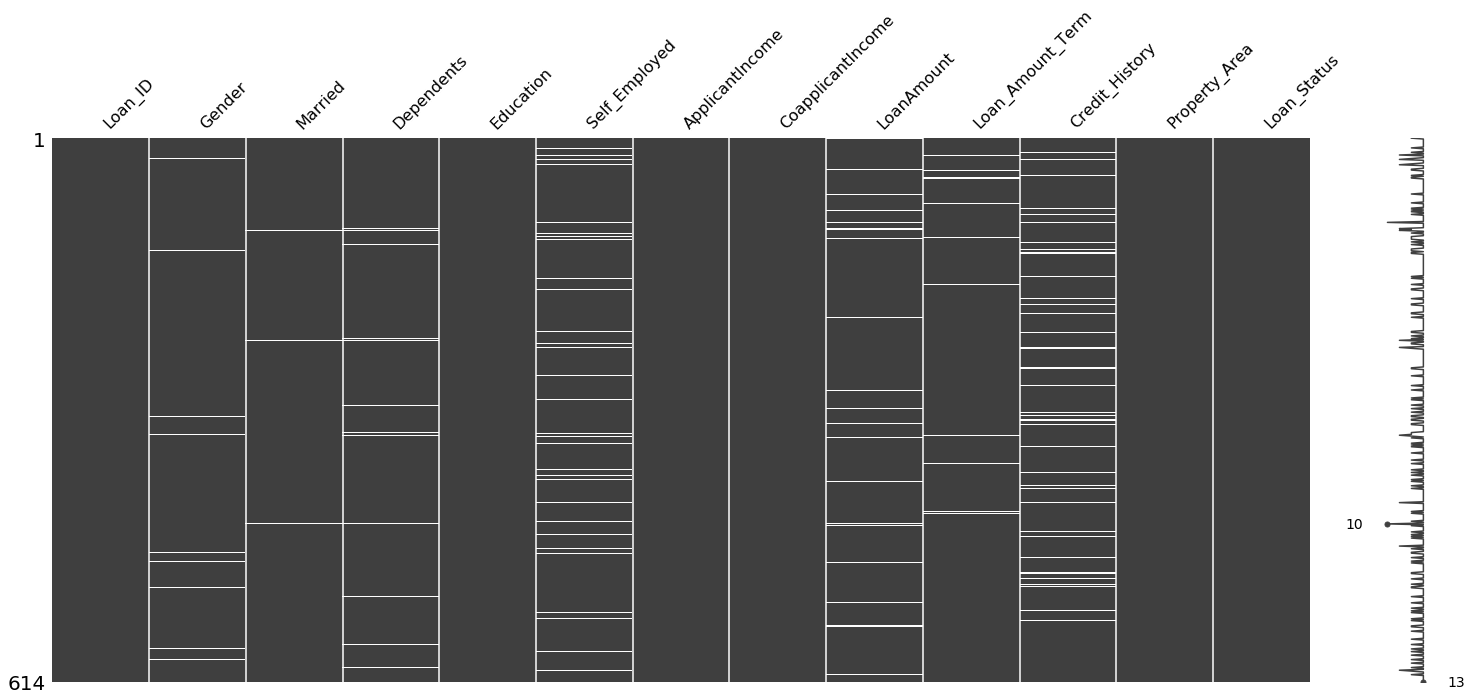

In [259]:
import missingno as mn 
mn.matrix(train)

### Missing Value Replacement

In [260]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [261]:
train.Gender.fillna('Male', inplace = True)

In [262]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [263]:
train.Married.fillna('Yes', inplace = True)

In [264]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [265]:
train.Dependents.fillna('0', inplace = True)

In [266]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [267]:
train.Self_Employed.fillna('No', inplace = True)

In [268]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [269]:
train.Credit_History.fillna(1.0, inplace = True)

In [270]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [271]:
train.Loan_Amount_Term.fillna(360.0, inplace = True)

### Box-Plot for Loan_Amount

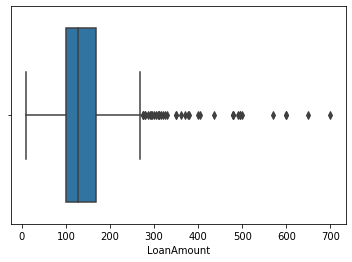

In [272]:
ax = sns.boxplot(x=train['LoanAmount'])

#### From the above box plot it is clear that there are many outliers present in the feature "LoanAmount"
#### So replacing the missing values with "Median" Value over Mean value will be preferred  

In [273]:
train.LoanAmount.fillna(train['LoanAmount'].median(), inplace = True)

In [274]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Change Loan Status Data Type

In [275]:
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})

#### Yes: 1, No: 0

### Data Visualization

#### Pairplots

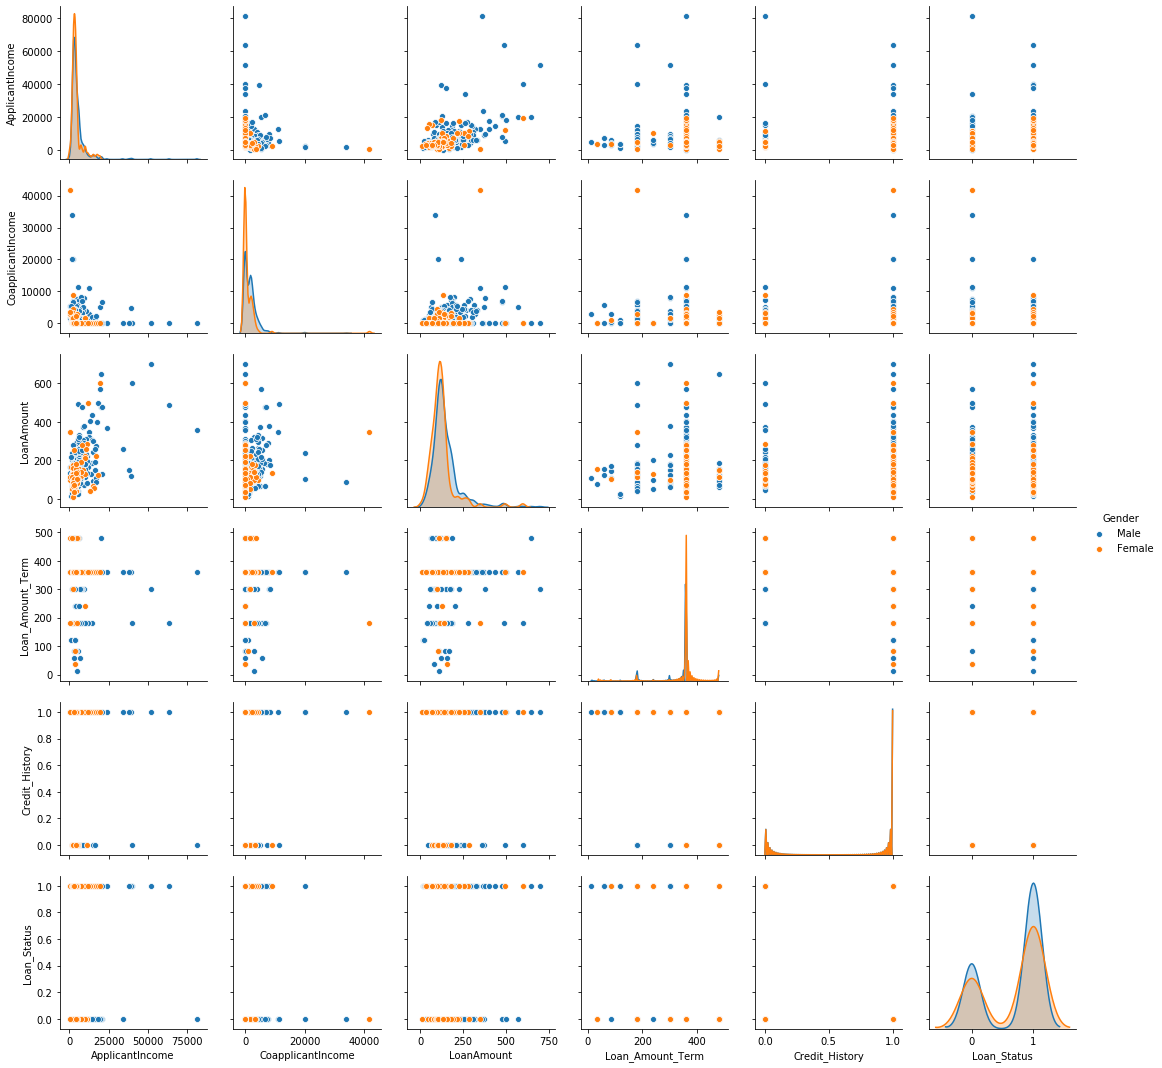

In [276]:
sns.pairplot(train, hue = 'Gender')
plt.show()

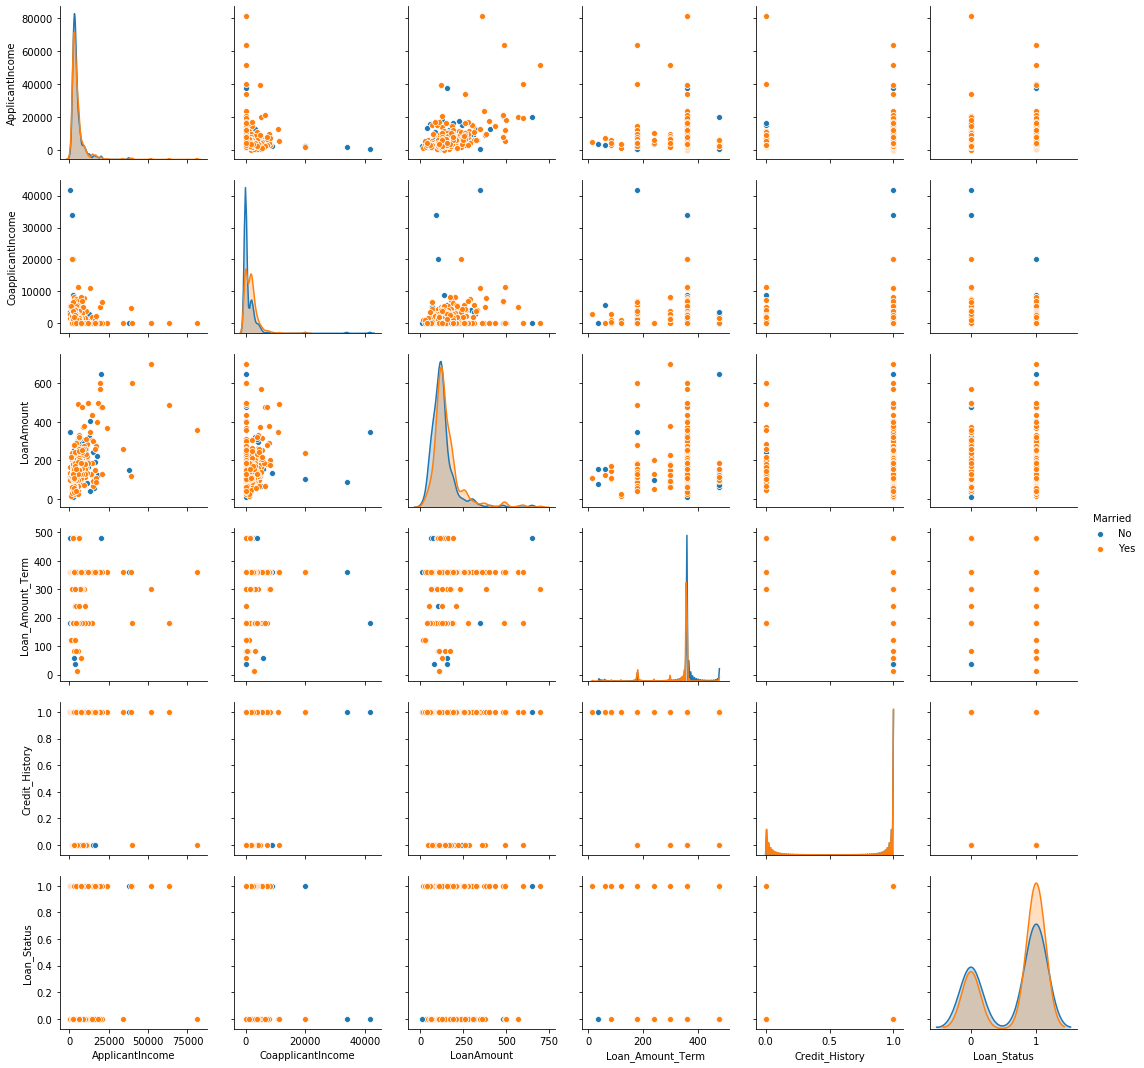

In [277]:
sns.pairplot(train, hue = 'Married')
plt.show()

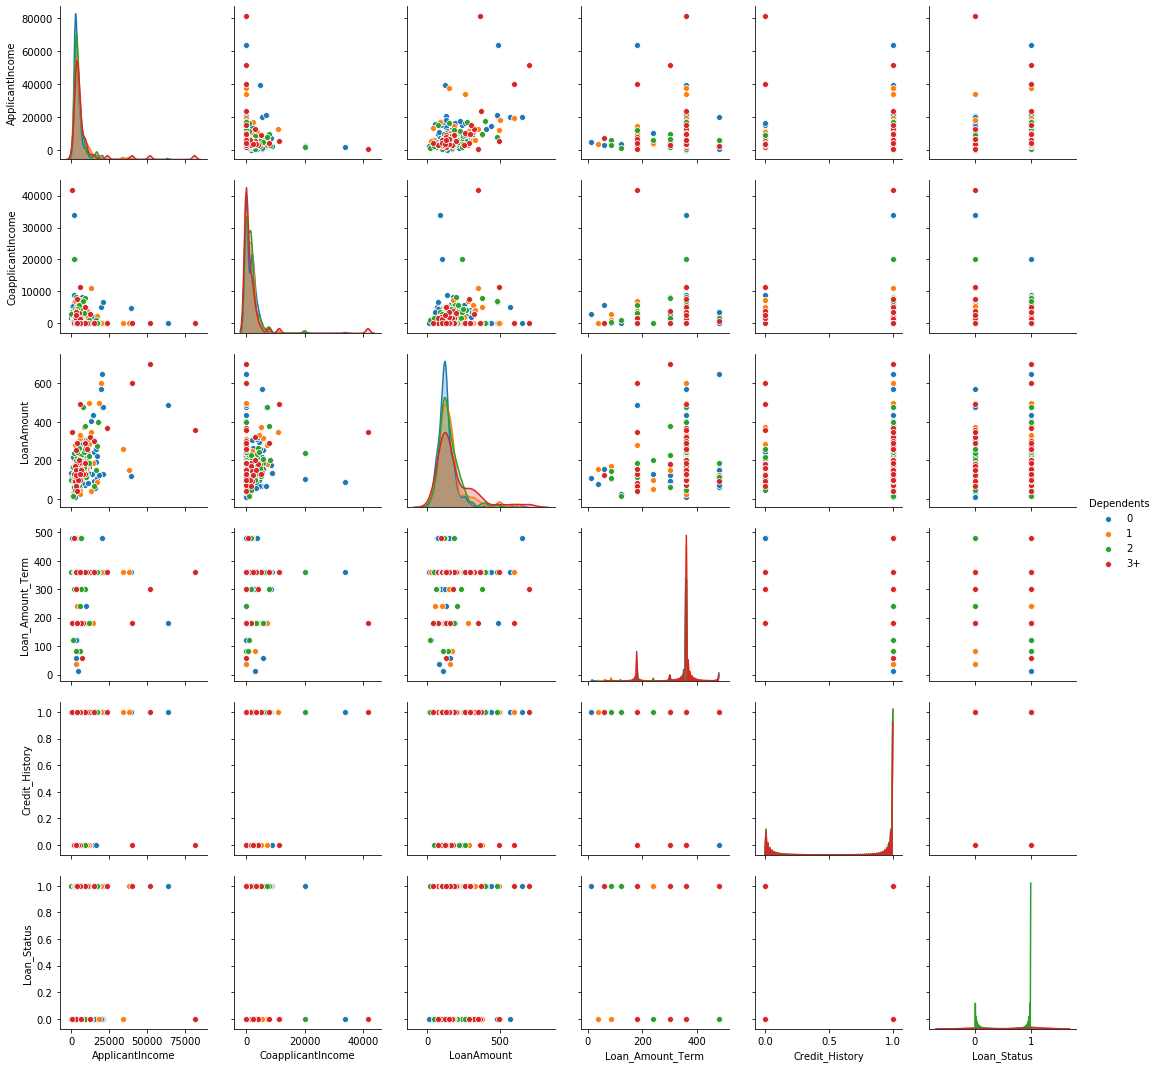

In [278]:
sns.pairplot(train, hue = 'Dependents')
plt.show()

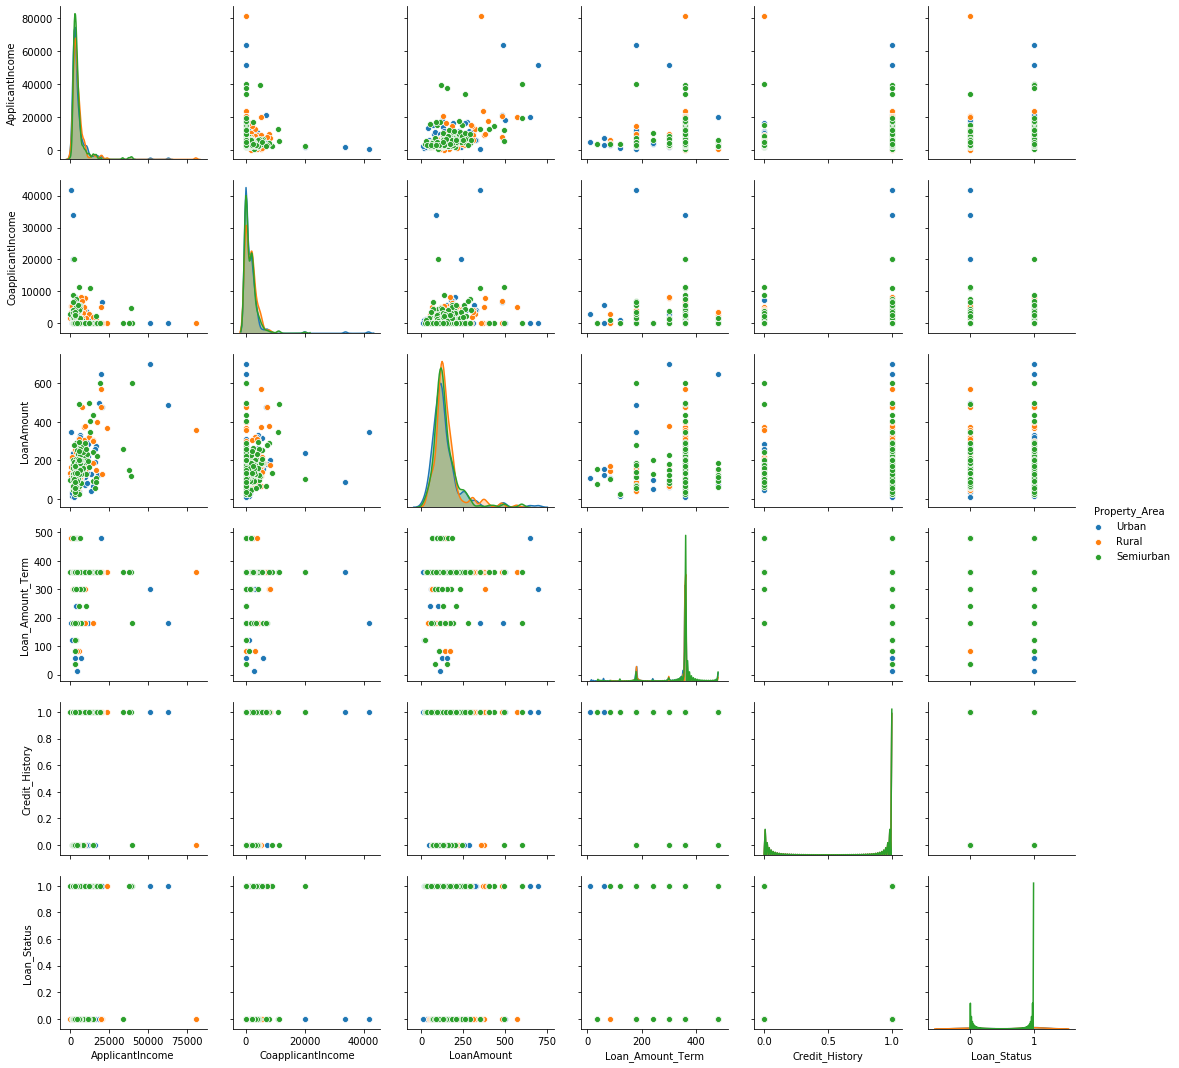

In [279]:
sns.pairplot(train, hue = 'Property_Area')
plt.show()

In [280]:
def bar_chart(feature):
    Y = train[train['Loan_Status']==1][feature].value_counts()
    N = train[train['Loan_Status']==0][feature].value_counts()
    df = pd.DataFrame([Y, N])
    df.index = ['Y', 'N']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

### Bar Plot And Count Plot

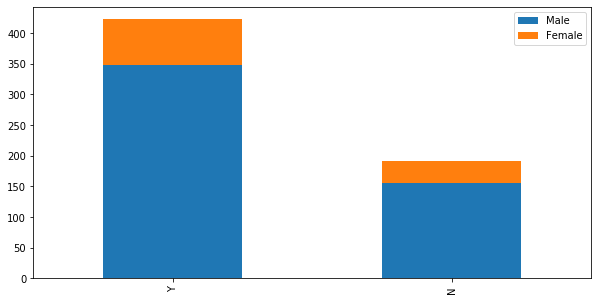

In [281]:
bar_chart('Gender')

Text(0.5, 1.0, 'Gender Vs. Loan_Status')

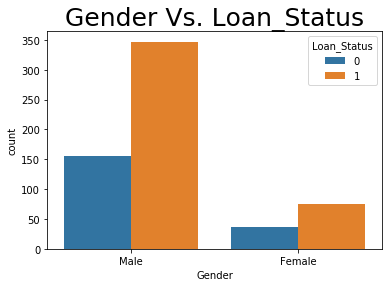

In [282]:
ax=sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.title("Gender Vs. Loan_Status", fontsize = 25)

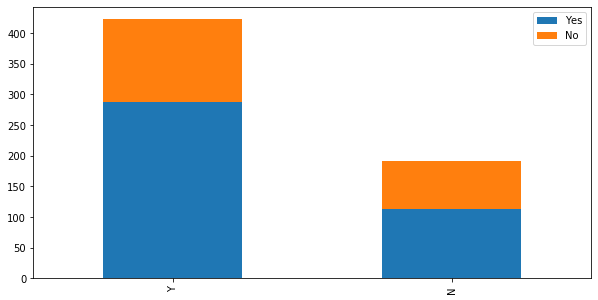

In [283]:
bar_chart('Married')

Text(0.5, 1.0, 'Married Vs. Loan_Status')

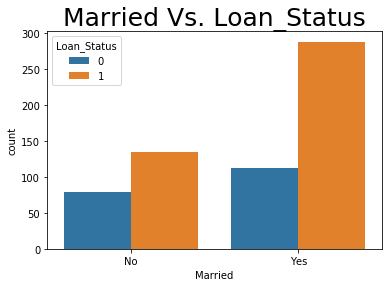

In [284]:
ax=sns.countplot(x='Married', hue='Loan_Status', data=train)
plt.title("Married Vs. Loan_Status", fontsize = 25)

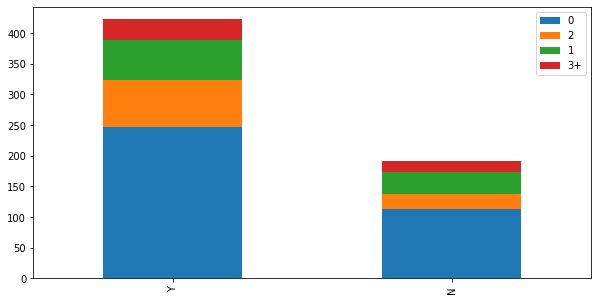

In [285]:
bar_chart('Dependents')

Text(0.5, 1.0, 'Dependents Vs. Loan_Status')

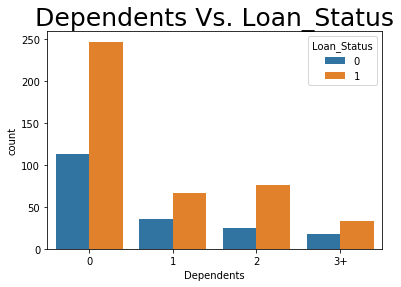

In [286]:
ax=sns.countplot(x='Dependents', hue='Loan_Status', data=train)
plt.title("Dependents Vs. Loan_Status", fontsize = 25)
# leg=ax.get_legend()
# leg.set_title('Loan_Status')
# legs=leg.texts

# legs[0].set_text('N')
# legs[1].set_text("Y")

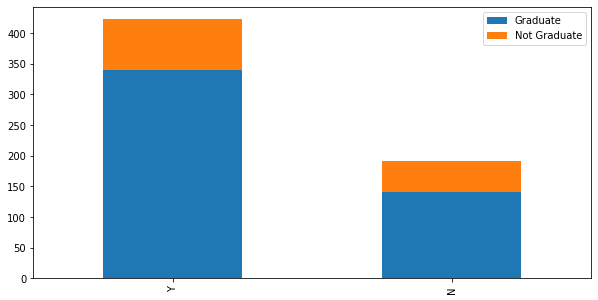

In [287]:
bar_chart('Education')

Text(0.5, 1.0, 'Education Vs. Loan_Status')

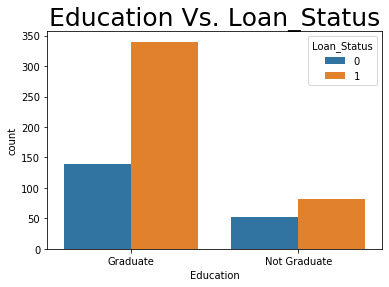

In [288]:
ax=sns.countplot(x='Education', hue='Loan_Status', data=train)
plt.title("Education Vs. Loan_Status", fontsize = 25)

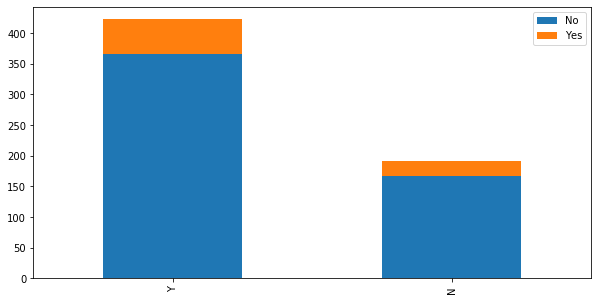

In [289]:
bar_chart('Self_Employed')

Text(0.5, 1.0, 'Self_Employed Vs. Loan_Status')

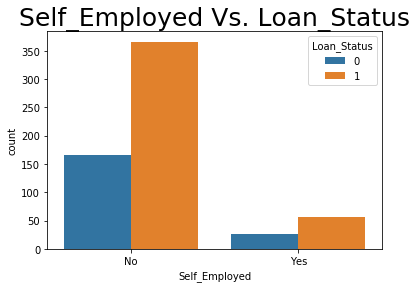

In [290]:
ax=sns.countplot(x='Self_Employed', hue='Loan_Status', data=train)
plt.title("Self_Employed Vs. Loan_Status", fontsize = 25)

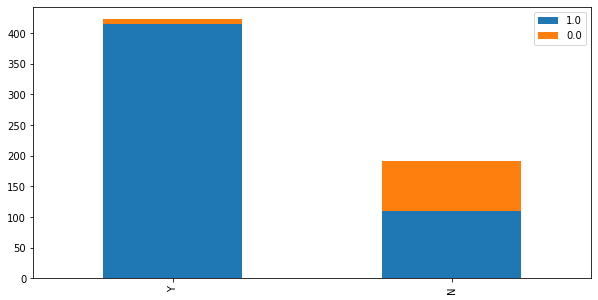

In [291]:
bar_chart('Credit_History')

Text(0.5, 1.0, 'Credit_History Vs. Loan_Status')

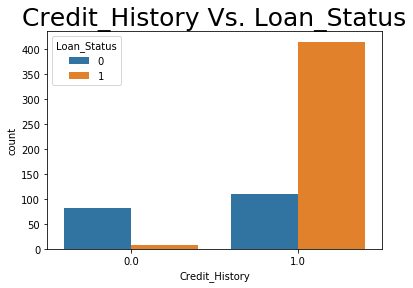

In [292]:
ax=sns.countplot(x='Credit_History', hue='Loan_Status', data=train)
plt.title("Credit_History Vs. Loan_Status", fontsize = 25)

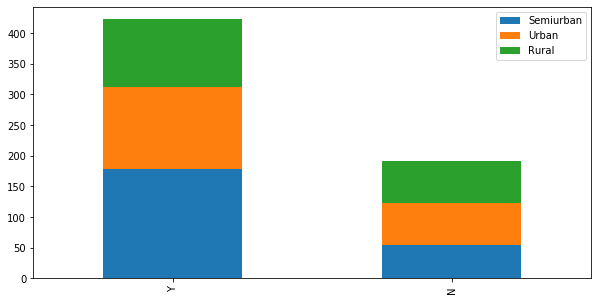

In [293]:
bar_chart('Property_Area')

Text(0.5, 1.0, 'Property_Area Vs. Loan_Status')

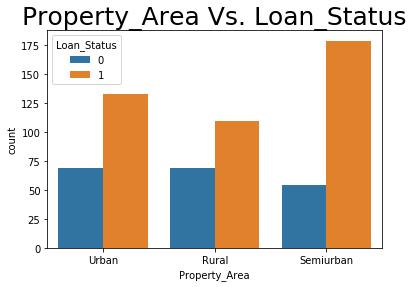

In [294]:
ax=sns.countplot(x='Property_Area', hue='Loan_Status', data=train)
plt.title("Property_Area Vs. Loan_Status", fontsize = 25)
# leg=ax.get_legend()
# leg.set_title('Loan_Status')
# legs=leg.texts

# legs[0].set_text('N')
# legs[1].set_text("Y")

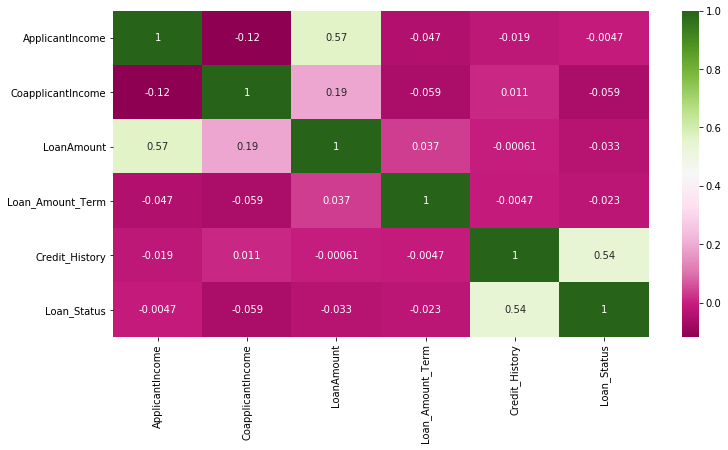

In [295]:
plt.subplots(figsize = (12,6))

sns.heatmap(train.corr(), annot = True, cmap = 'PiYG')

###  Analysis of Average Applicant Income, Coapplicant Income and Loan Amount (In Thousands) 

#### Property_Area Wise:

In [296]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [297]:
train_PA = train.groupby(['Property_Area'])[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']].mean()
train_PA

,ApplicantIncome,CoapplicantIncome,LoanAmount
Property_Area,,,
Rural,5554.083799,1645.536983,151.446927
Semiurban,5292.261803,1520.133047,145.128755
Urban,5398.247525,1716.350495,141.425743


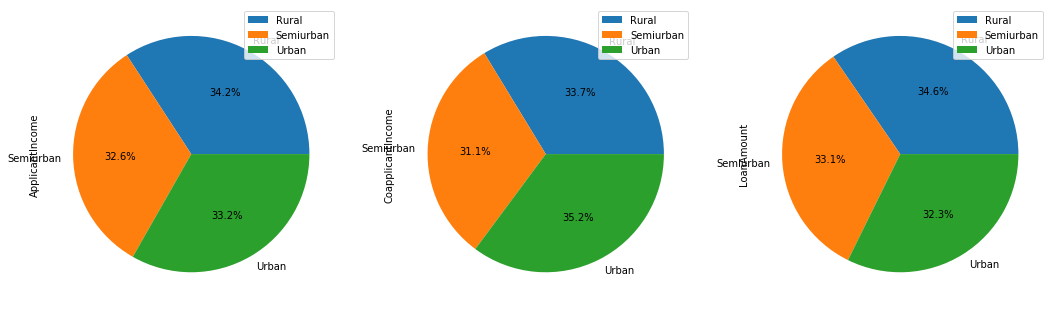

In [298]:
plot = train_PA.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = train_PA.index)

#### Dependents Wise:

In [299]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [300]:
train_D = train.groupby(['Dependents'])[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']].mean()
train_D

,ApplicantIncome,CoapplicantIncome,LoanAmount
Dependents,,,
0,4928.680556,1600.880889,135.330556
1,5962.274510,1426.235294,157.421569
2,4926.782178,1687.245544,149.564356
3+,8581.215686,2024.313725,188.431373


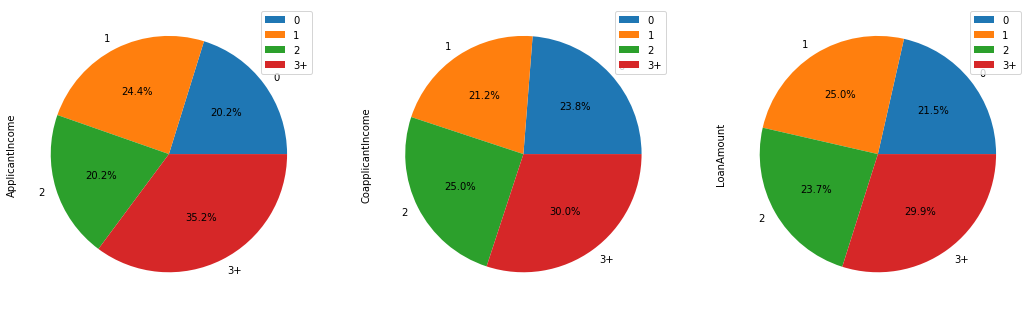

In [301]:
plot = train_D.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = train_D.index)

#### Self_Employed Wise:

In [302]:
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [303]:
train_SE = train.groupby(['Self_Employed'])[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']].mean()
train_SE

,ApplicantIncome,CoapplicantIncome,LoanAmount
Self_Employed,,,
No,5098.678571,1639.727293,141.954887
Yes,7380.817073,1501.341463,170.390244


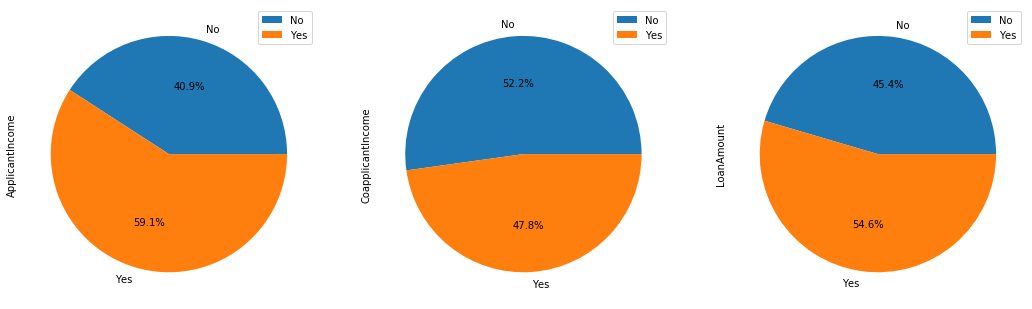

In [304]:
plot = train_SE.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = train_SE.index)

#### Education Wise:

In [305]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [306]:
train_Ed = train.groupby(['Education'])[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']].mean()
train_Ed

,ApplicantIncome,CoapplicantIncome,LoanAmount
Education,,,
Graduate,5857.433333,1717.474833,153.245833
Not Graduate,3777.283582,1276.544776,118.910448


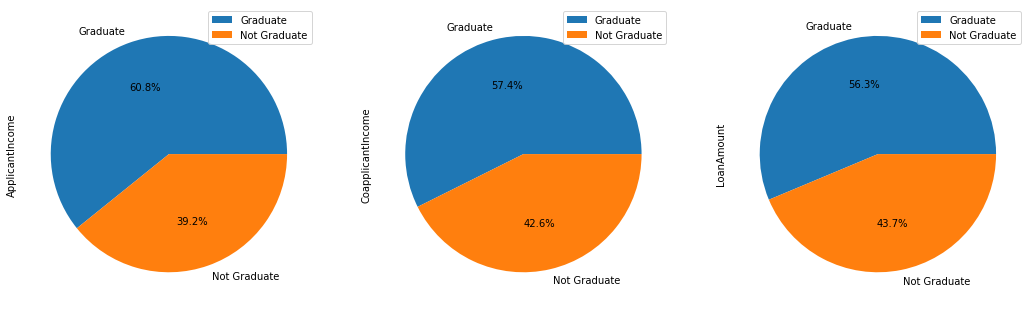

In [307]:
plot = train_Ed.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = train_Ed.index)

#### Marriage Wise:

In [308]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [310]:
train_M = train.groupby(['Married'])[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']].mean()
train_M

,ApplicantIncome,CoapplicantIncome,LoanAmount
Married,,,
No,4970.384977,1316.558685,128.85446
Yes,5633.496259,1783.087082,154.72818


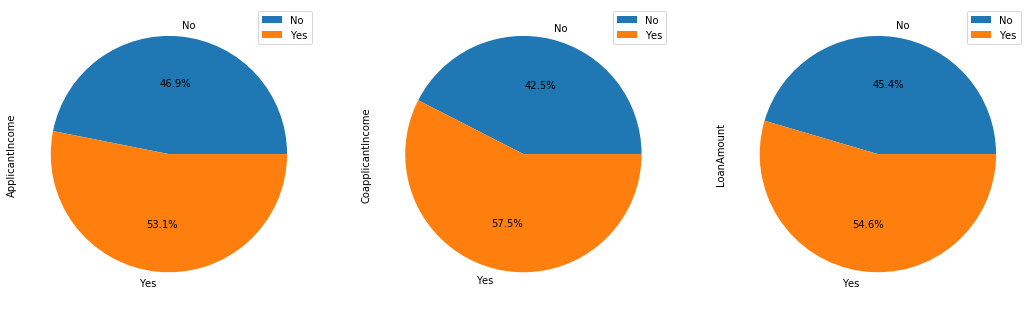

In [311]:
plot = train_M.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = train_M.index)

### Analysis of Loan_Amount_Term, Credit_History, Loan_Status

#### Education Wise:

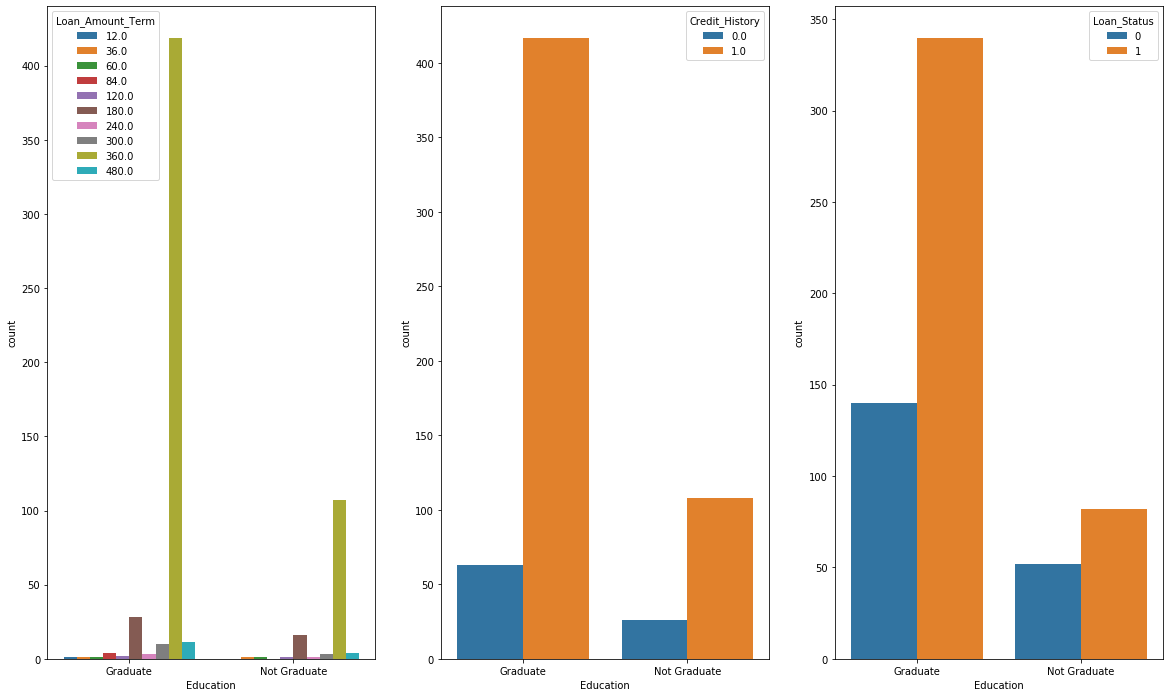

In [320]:
fig, axs = plt.subplots(ncols=3,  figsize = (20,12))
sns.countplot(x="Education", hue ='Loan_Amount_Term', data = train,  ax = axs[0])
sns.countplot(x="Education", hue ='Credit_History', data = train,  ax = axs[1])
sns.countplot(x="Education", hue ='Loan_Status', data = train,  ax = axs[2])

#### Marriage Wise:

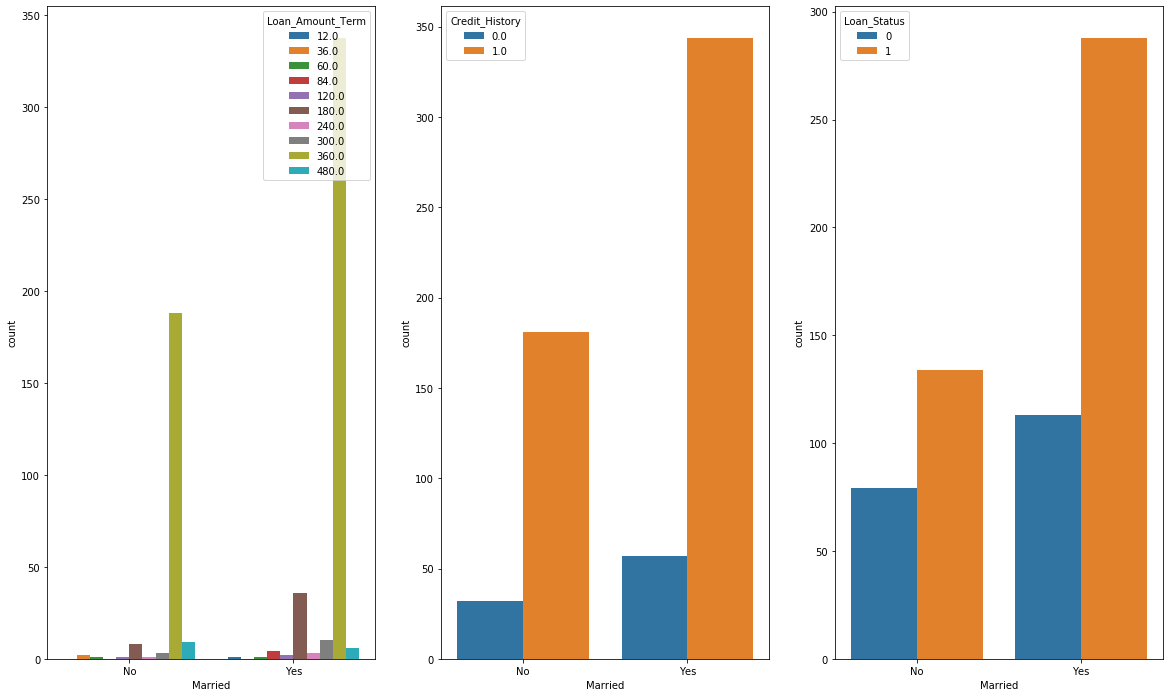

In [322]:
fig, axs = plt.subplots(ncols=3,  figsize = (20,12))
sns.countplot(x="Married", hue ='Loan_Amount_Term', data = train,  ax = axs[0])
sns.countplot(x="Married", hue ='Credit_History', data = train,  ax = axs[1])
sns.countplot(x="Married", hue ='Loan_Status', data = train,  ax = axs[2])

#### Self_Employed Wise:

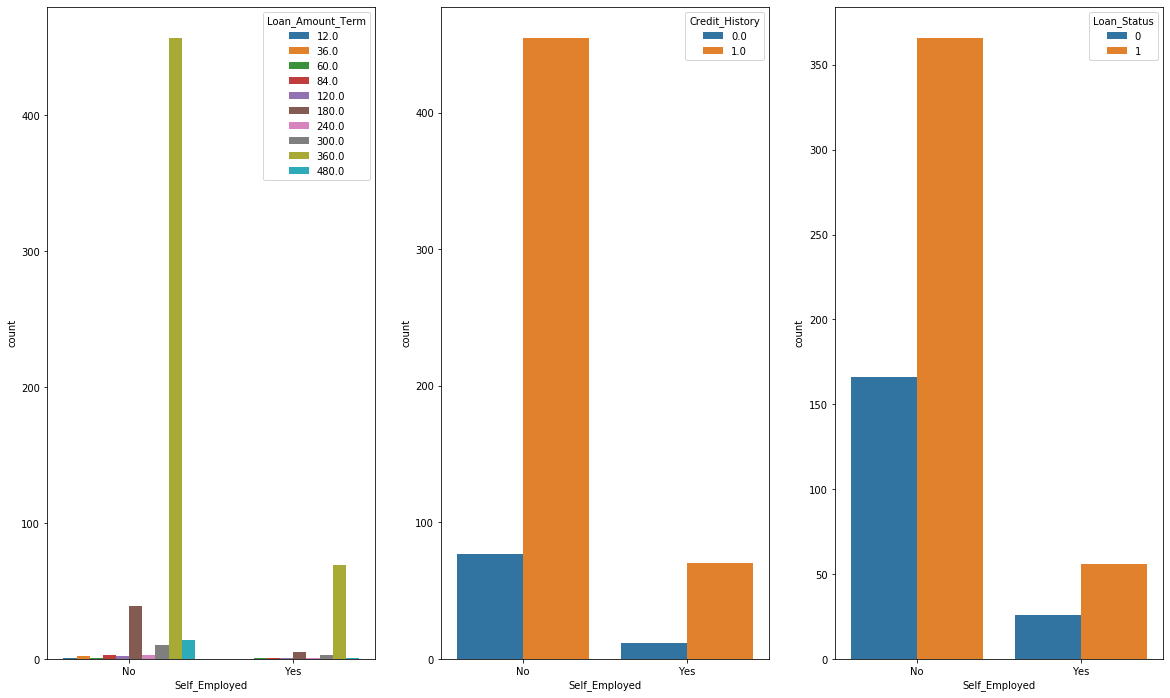

In [323]:
fig, axs = plt.subplots(ncols=3,  figsize = (20,12))
sns.countplot(x="Self_Employed", hue ='Loan_Amount_Term', data = train,  ax = axs[0])
sns.countplot(x="Self_Employed", hue ='Credit_History', data = train,  ax = axs[1])
sns.countplot(x="Self_Employed", hue ='Loan_Status', data = train,  ax = axs[2])

#### Dependents Wise:

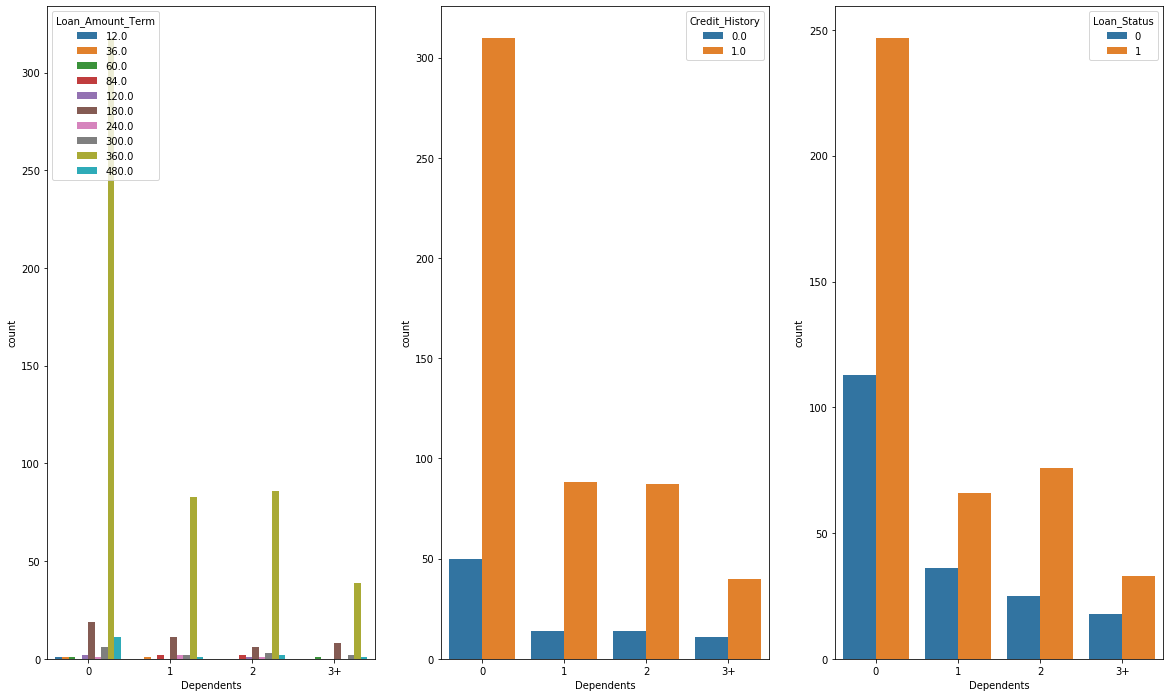

In [324]:
fig, axs = plt.subplots(ncols=3,  figsize = (20,12))
sns.countplot(x="Dependents", hue ='Loan_Amount_Term', data = train,  ax = axs[0])
sns.countplot(x="Dependents", hue ='Credit_History', data = train,  ax = axs[1])
sns.countplot(x="Dependents", hue ='Loan_Status', data = train,  ax = axs[2])

#### Property_Area Wise:

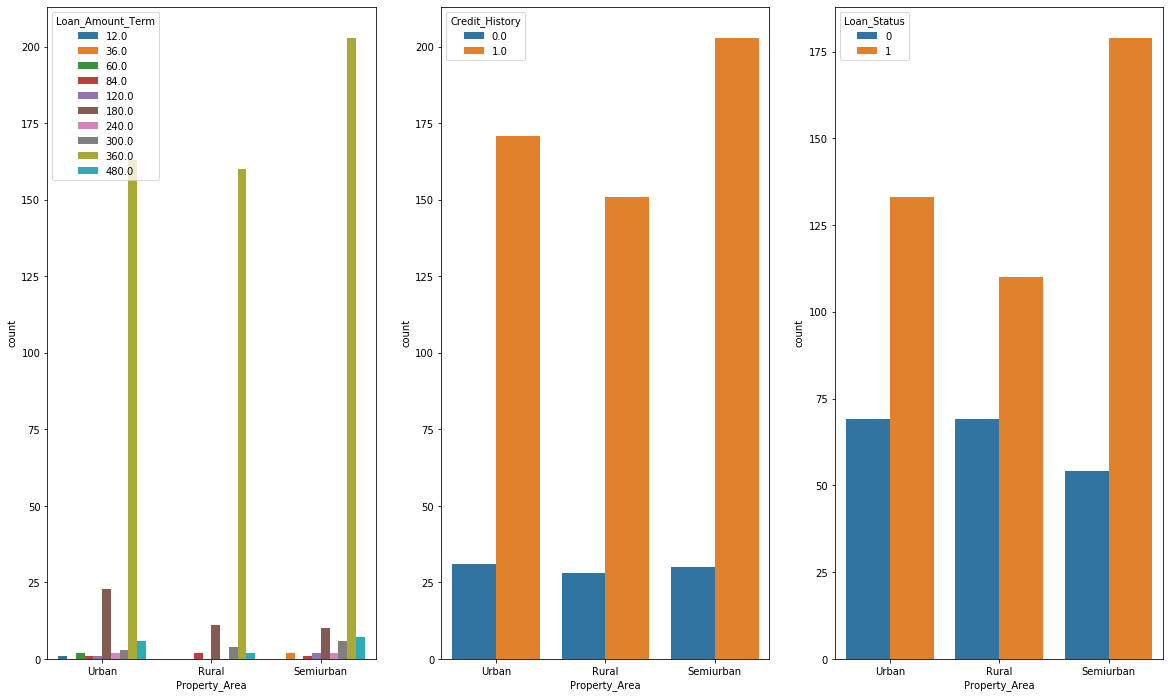

In [325]:
fig, axs = plt.subplots(ncols=3,  figsize = (20,12))
sns.countplot(x="Property_Area", hue ='Loan_Amount_Term', data = train,  ax = axs[0])
sns.countplot(x="Property_Area", hue ='Credit_History', data = train,  ax = axs[1])
sns.countplot(x="Property_Area", hue ='Loan_Status', data = train,  ax = axs[2])

### Converting Categorical features into Numerical features

In [237]:
train.Gender = train.Gender.map({"Male":1, "Female":0})
train.Married = train.Married.map({'Yes':1, 'No':0})
train.Dependents = train.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
train.Education = train.Education.map({'Graduate':1, 'Not Graduate':0})
train.Self_Employed = train.Self_Employed.map({'No':1, 'Yes':0})
train.Property_Area = train.Property_Area.map({'Semiurban':1, 'Rural':0, 'Urban':2})
# train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})


In [238]:
train.drop(['Loan_ID'], axis = 1, inplace = True)

In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


In [240]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Heatmap for Correlation Values

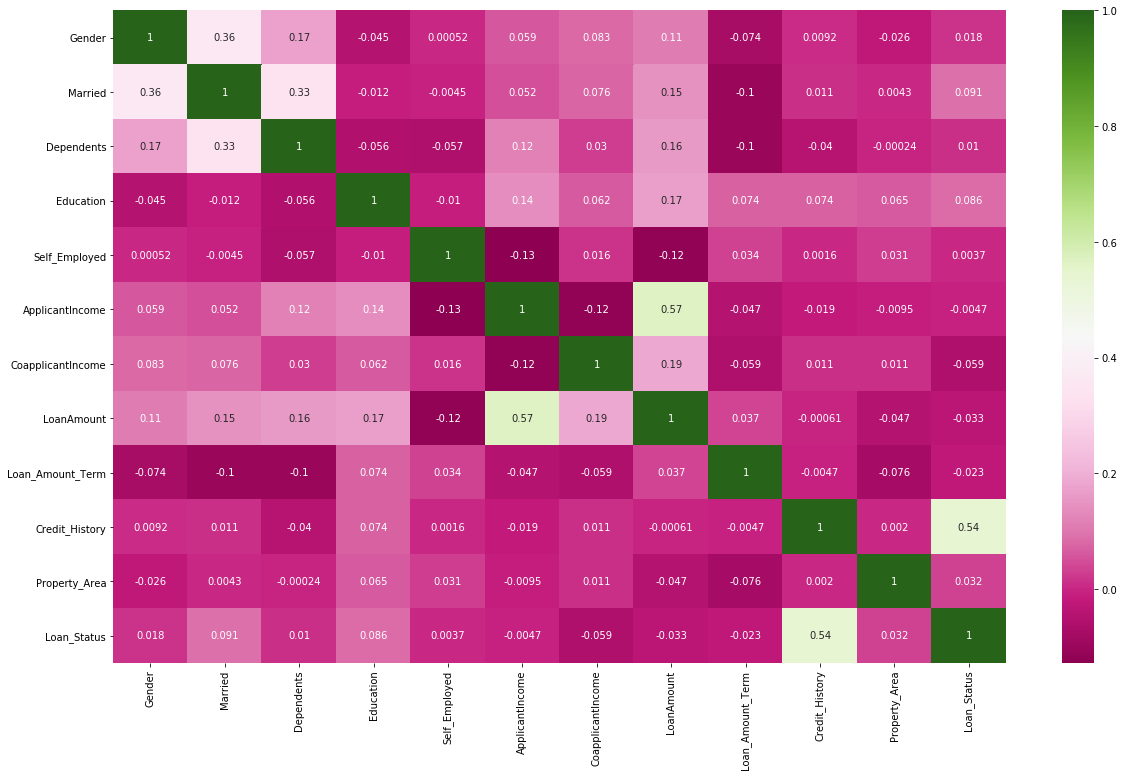

In [241]:
plt.subplots(figsize = (20,12))

sns.heatmap(train.corr(), annot = True, cmap = 'PiYG')

- **Credit History and Loan status are moderately correlated with value 0.54**
- **Applicant Income and Loan Amount are moderately correlated with value 0.57**
- **Dependents and Married are also positively correlated with value 0.33**
- **Gender and Married are also positively correlated with value 0.36**


### Dist Plot

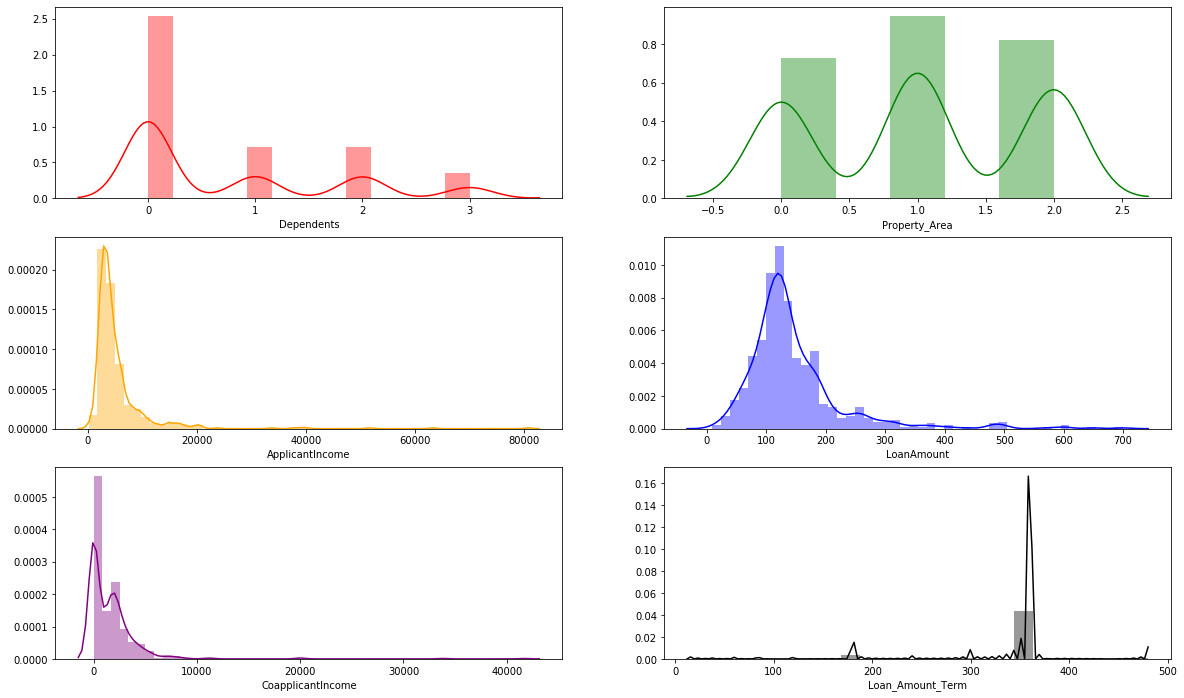

In [243]:
fig, axs = plt.subplots(ncols=2, nrows = 3, figsize = (20,12))
sns.distplot(train['Dependents'], color = 'red',  ax = axs[0][0])
sns.distplot(train['Property_Area'], color = 'green',  ax = axs[0][1])
sns.distplot(train['ApplicantIncome'], color = 'orange',  ax = axs[1][0])
sns.distplot(train['LoanAmount'], color = 'blue',  ax = axs[1][1])
sns.distplot(train['CoapplicantIncome'], color = 'purple',  ax = axs[2][0])
sns.distplot(train['Loan_Amount_Term'], color = 'black',  ax = axs[2][1])
plt.show()

### Let's See KDE plots 

([<matplotlib.axis.XTick at 0x1fa50b5f0b8>,
 <a list of 3 Text xticklabel objects>)

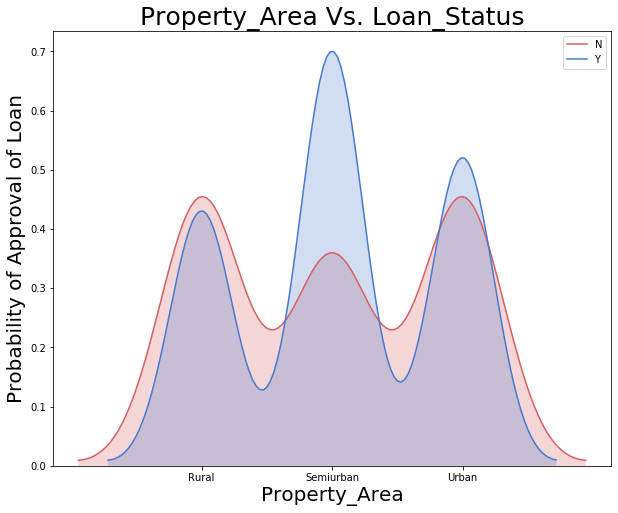

In [1075]:
plt.subplots(figsize=(10,8))
ax = sns.kdeplot(train.loc[(train['Loan_Status'] == 0),'Property_Area'],shade=True,color='r',label='N')
ax=sns.kdeplot(train.loc[(train['Loan_Status'] == 1),'Property_Area'],shade=True,color='b',label='Y' )
plt.title('Property_Area Vs. Loan_Status', fontsize =25)
plt.ylabel('Probability of Approval of Loan', fontsize=20)
plt.xlabel('Property_Area', fontsize=20)
labels = ['Rural', 'Semiurban', 'Urban']
plt.xticks(sorted(train.Property_Area.unique()),labels)

Text(0.5, 0, 'Dependents')

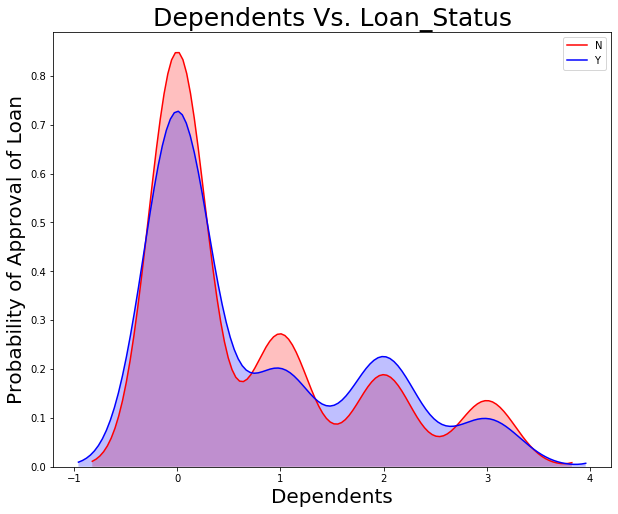

In [158]:
plt.subplots(figsize=(10,8))
ax = sns.kdeplot(train.loc[(train['Loan_Status'] == 0),'Dependents'],shade=True,color='r',label='N')
ax=sns.kdeplot(train.loc[(train['Loan_Status'] == 1),'Dependents'],shade=True,color='b',label='Y' )
plt.title('Dependents Vs. Loan_Status', fontsize =25)
plt.ylabel('Probability of Approval of Loan', fontsize=20)
plt.xlabel('Dependents', fontsize=20)
# labels = ['Rural', 'Semiurban', 'Urban']
# plt.xticks(sorted(train.Property_Area.unique()),labels)

Text(0.5, 0, 'Dependents')

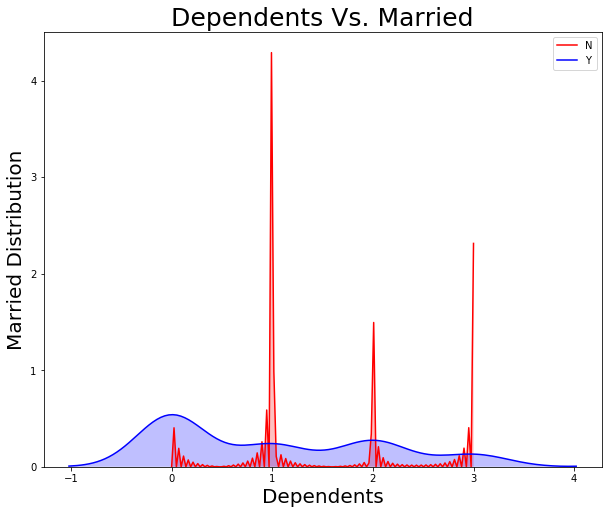

In [159]:
plt.subplots(figsize=(10,8))
ax = sns.kdeplot(train.loc[(train['Married'] == 0),'Dependents'],shade=True,color='r',label='N')
ax=sns.kdeplot(train.loc[(train['Married'] == 1),'Dependents'],shade=True,color='b',label='Y' )
plt.title('Dependents Vs. Married', fontsize =25)
plt.ylabel('Married Distribution', fontsize=20)
plt.xlabel('Dependents', fontsize=20)

## Model Building

In [1077]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status'].astype(int)

### Import Classifiers Modules

In [1078]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma = 'scale'),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(random_state = 22),
    AdaBoostClassifier(),
    GradientBoostingClassifier(random_state = 0),
    GaussianNB(),
    LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter = 1000)]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [1079]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Classifier Accuracy')

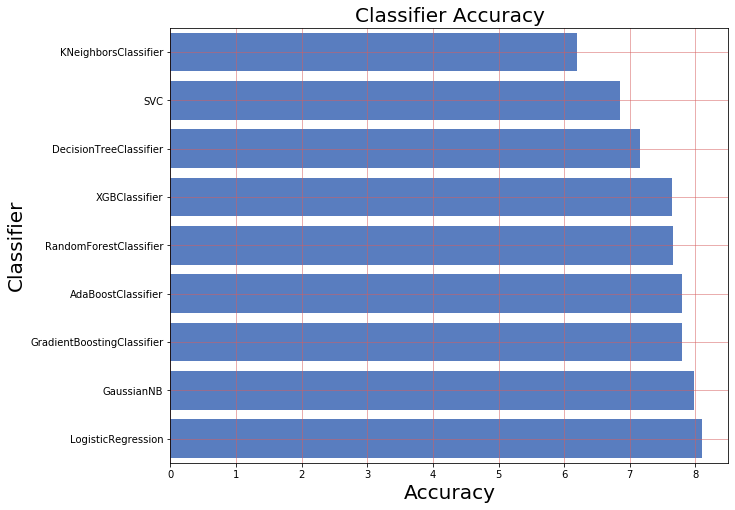

In [1080]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

#### From above we can see that Logistic Regression Performs well on the training set( Accuracy more than 80%).
#### But in case of these Loan Approval large dataset Random Forest Classifier or Decision Tree Classifier are more preferrable.

### Performance on Testing Set

In [1081]:
test.shape

(367, 12)

In [1082]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Drop Loan_ID Variable

In [1083]:
test.drop(['Loan_ID'], axis = 1, inplace = True)

#### Check for Missing values

In [1084]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Missing Value Replacement

In [1085]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [1086]:
test.Gender.fillna('Male', inplace = True)

In [1087]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [1088]:
test.Dependents.fillna('0', inplace = True)

In [1089]:
test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [1090]:
test.Self_Employed.fillna('No', inplace = True)

In [1091]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [1092]:
test.Credit_History.fillna(1.0, inplace = True)

In [1093]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [1094]:
test.Loan_Amount_Term.fillna(360.0, inplace = True)

### Box-Plot for Loan_Amount of Test dataset

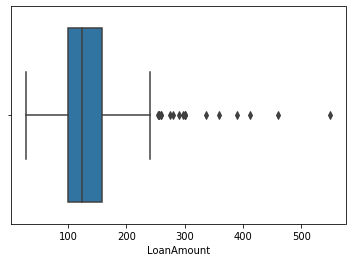

In [1095]:
ax = sns.boxplot(x=test['LoanAmount'])

#### Since There are not much outliers are present. So we can replace the missing values with "Mean value".

In [1096]:
test.LoanAmount.fillna(test['LoanAmount'].mean(), inplace = True)

In [1097]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Feature Engineering

In [1098]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


In [1099]:
test.Gender = test.Gender.map({"Male":1, "Female":0})
test.Married = test.Married.map({'Yes':1, 'No':0})
test.Dependents = test.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
test.Education = test.Education.map({'Graduate':1, 'Not Graduate':0})
test.Self_Employed = test.Self_Employed.map({'No':1, 'Yes':0})
test.Property_Area = test.Property_Area.map({'Semiurban':1, 'Rural':0, 'Urban':2})

### Fitting the Model

In [1105]:
clf = DecisionTreeClassifier()
xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1:]
ytrain=ytrain.values.ravel()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1106]:
prediction = clf.predict(test)

In [1107]:
submission = pd.DataFrame({"Loan_Status": prediction})
submission.to_csv('submission.csv', index = False)

In [1108]:
submission = pd.read_csv('submission.csv')
submission.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,0


In [1109]:
prediction

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

### Note: Checked the result with Logistic Regression but the output is completely biased one. It gives 1 for all data points. So during testing I chose Decision Tree Classifier.

### You can use Random Forest and Boosting algorithms to check the performance